# Histogram

In [1]:
import sys
sys.path.append('../utils')

import utils

In [2]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot, init_notebook_mode

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
rng = np.random.default_rng(1234567890)
arr = rng.standard_normal(10000)

## Matplotlib

[Documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html)

In [4]:
import matplotlib.pyplot as plt

### Simple Histogram

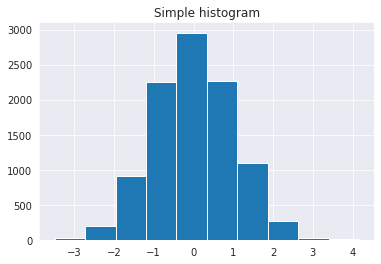

In [7]:
plt.hist(arr)
plt.title('Simple histogram')

# Saving the image
utils.save_mpl(1)

plt.show()

### Altering bin size

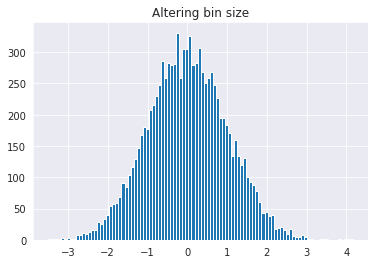

In [8]:
plt.hist(arr, bins=100)
plt.title('Altering bin size')
utils.save_mpl(2)
plt.show()

### Changing bar color

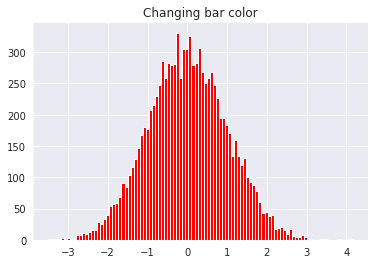

In [9]:
plt.hist(arr, bins=100, color='r')
plt.title('Changing bar color')
utils.save_mpl(3)
plt.show()

### Adding titles and x,y label

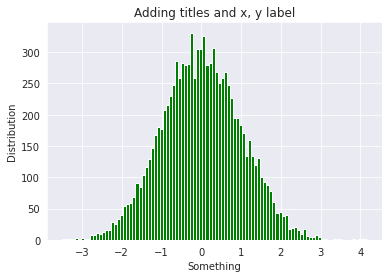

In [10]:
plt.hist(arr, bins=100, color='g')
plt.title('Adding titles and x, y label')
plt.xlabel('Something')
plt.ylabel('Distribution')

utils.save_mpl(4)
plt.show()

### Updating histogram colors

[Link](https://matplotlib.org/stable/gallery/statistics/hist.html)

In [61]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

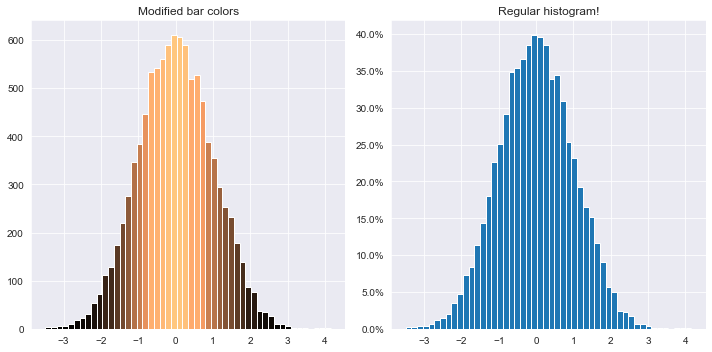

In [62]:
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(10, 5))

n_bins=50

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(arr, bins=n_bins)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()
# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.copper(norm(thisfrac))
    thispatch.set_facecolor(color)

# Setting title for this axes
axs[0].set_title('Modified bar colors')
    
# We can also normalize our inputs by the total number of counts
axs[1].hist(arr, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1].set_title('Regular histogram!')

utils.save_mpl(5)

### 2-dimensional Histograms

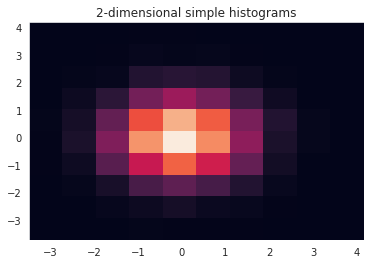

In [11]:
# Creating a second distribution
arr2 = rng.standard_normal(10000)

plt.hist2d(arr, arr2)
plt.title('2-dimensional simple histograms')

utils.save_mpl(6)

plt.show()

### Increasing number of bins in a 2d-histogram

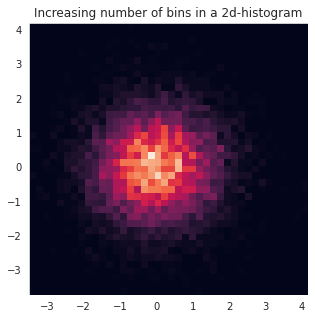

In [12]:
plt.figure(figsize=(5, 5))

# Increasing number of bins
plt.hist2d(arr, arr2, bins=40)
plt.title('Increasing number of bins in a 2d-histogram')

utils.save_mpl(7)
plt.show()

### Changing hist-2d cmap

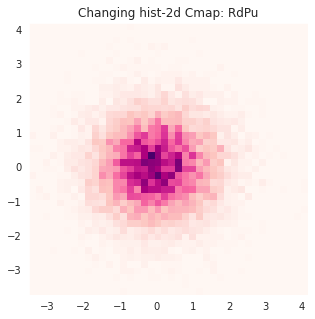

In [13]:
plt.figure(figsize=(5,5))
plt.hist2d(arr, arr2, bins=40, cmap='RdPu')
plt.title('Changing hist-2d Cmap: RdPu')

utils.save_mpl(8)

plt.show()

### Subplots of hist2d plots

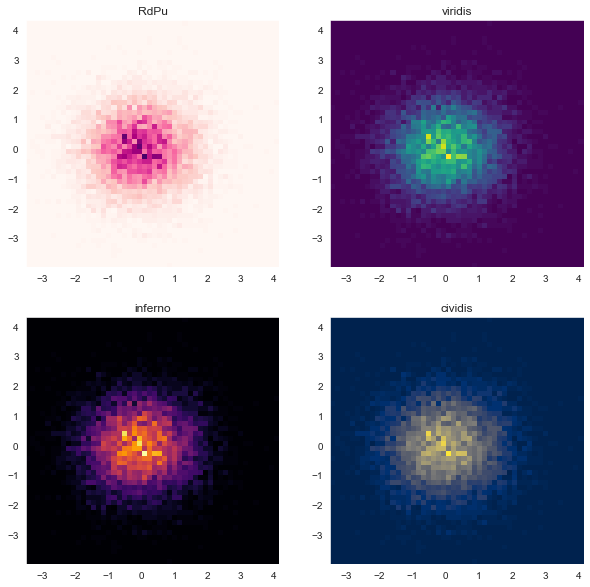

In [78]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

idx = 0
cmaps = ['RdPu', 'viridis', 'inferno', 'cividis']

for i in range(2):
    for j in range(2):
        ax[i][j].hist2d(arr, arr2, bins=50, cmap=cmaps[idx])
        ax[i][j].set_title(cmaps[idx])
        idx += 1
        
utils.save_mpl(9)
plt.show()

### hist2d with log normal colors

This requires `matplotlib.colors` so just do

```python
from matplotlib import colors
```

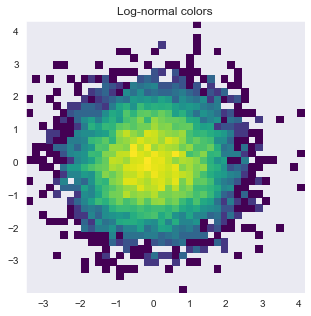

In [131]:
from matplotlib import colors

plt.figure(figsize=(5,5))
plt.hist2d(arr, arr2, bins=40, cmap='viridis', norm=colors.LogNorm())
plt.title('Log-normal colors')

utils.save_mpl(10)

plt.show()

### histogram with `mean` & `median` drawn

In [15]:
from scipy.stats import skewnorm

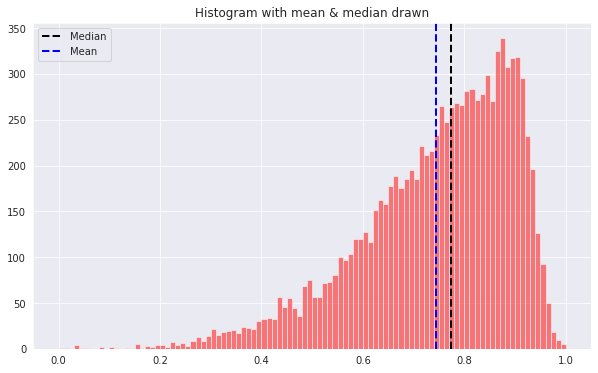

In [16]:
plt.figure(figsize=(10, 6))

# Creating left skewed data
left_skewed = skewnorm.rvs(a=-10,loc=100,size=10000)

left_skewed = left_skewed - min(left_skewed)
left_skewed = left_skewed / max(left_skewed)

plt.hist(left_skewed, alpha=.5, bins=100, color='r')
plt.axvline(np.median(left_skewed), color="black", ls="--", lw=2, label="Median")
plt.axvline(np.mean(left_skewed), color="blue", ls="--", lw=2, label="Mean")

plt.legend()
plt.title('Histogram with mean & median drawn')

utils.save_mpl(11)

plt.show()

## Seaborn

[Documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [6]:
import seaborn as sns

### Histogram using `sns.distplot()`

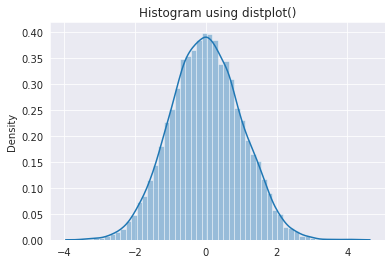

In [17]:
sns.distplot(arr)
plt.title('Histogram using distplot()')

# Saving the image
utils.save_sns(1)

plt.show()

### Histogram using `sns.displot()`

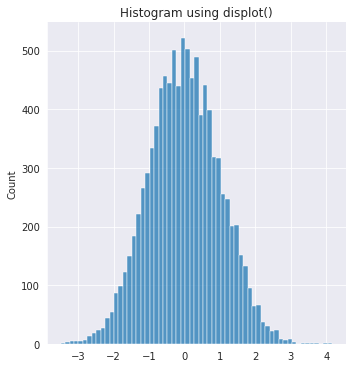

In [19]:
sns.displot(arr)
plt.title('Histogram using displot()')

# Saving the image
utils.save_sns(2)

plt.show()

### `sns.displot` in `kde` (Kernel Density Estimation) mode

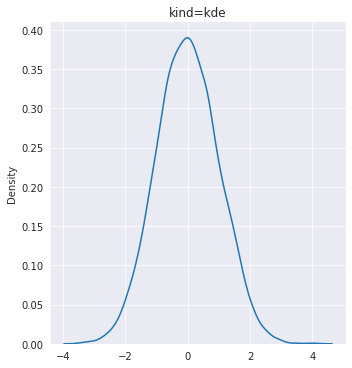

In [20]:
sns.displot(arr, kind='kde')
plt.title('kind=kde')

# Saving the image
utils.save_sns(3)

plt.show()

### `sns.displot` in `ecdf` (Empirical cumulative distribution functions) mode

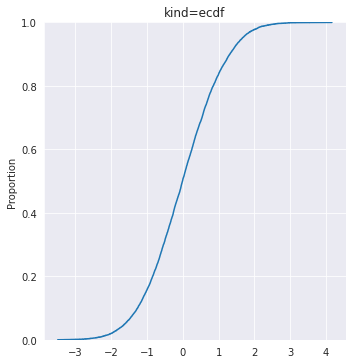

In [21]:
sns.displot(arr, kind='ecdf')
plt.title('kind=ecdf')

# Saving the image
utils.save_sns(4)

plt.show()

### Histogram bars with KDEs enabled

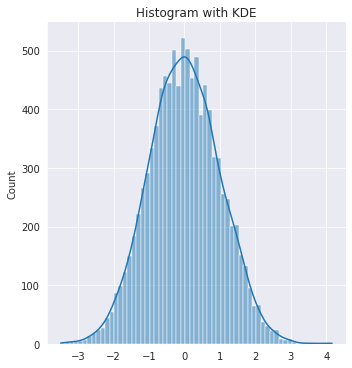

In [22]:
sns.displot(arr, kde=True)
plt.title('Histogram with KDE')

# Saving the image
utils.save_sns(5)

plt.show()

### 2d histogram with `sns.displot()`

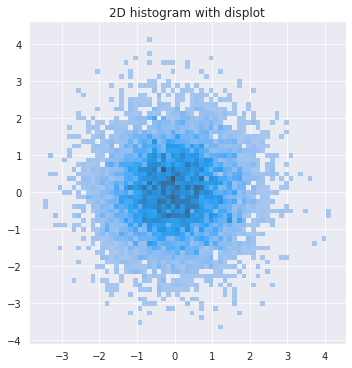

In [25]:
sns.displot(x=arr, y=arr2)
plt.title('2D histogram with displot')

# Saving the image
utils.save_sns(6)

plt.show()

### Bivariate histogram (2D) using KDEs

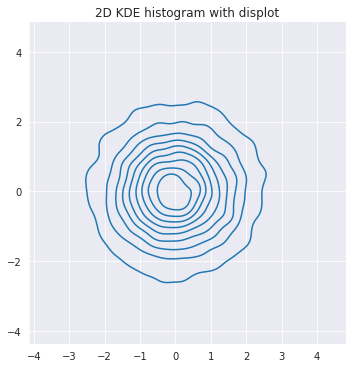

In [29]:
sns.displot(x=arr, y=arr2, kind='kde')
plt.title('2D KDE histogram with displot')

# Saving the image
utils.save_sns(7)

plt.show()

### Plotting marginal `rug` alongside 2d-hist

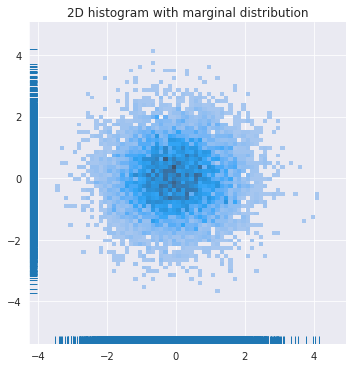

In [33]:
sns.displot(x=arr, y=arr2, rug=True)
plt.title('2D histogram with marginal distribution')

# Saving the image
utils.save_sns(8)

plt.show()

## Plotly.express

[Documentation](https://plotly.com/python/histograms/)

**Installation**
```bash
pip install plotly kaleido
```

In [8]:
import plotly.express as px

In [9]:
fig = px.histogram(arr)
fig.show()

utils.save_px(fig, 1)

## Plotnine

[Documentation](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html)

**Installation**
```bash
pip install plotnine
```

In [10]:
from plotnine import ggplot, aes, geom_bar, geom_histogram, stat_bin

Using `geom_bar` Bar plot geometric objects

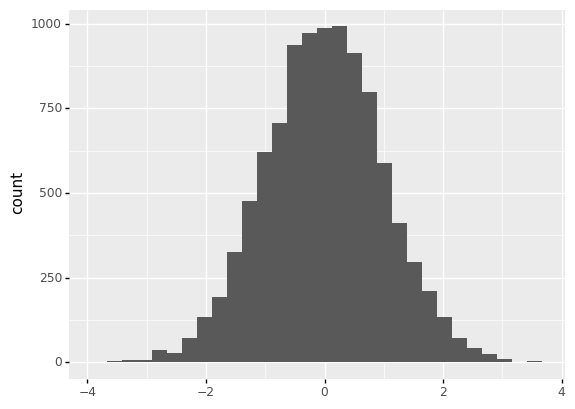

<ggplot: (8765727026926)>

In [11]:
fig = ggplot() + aes(x=arr) + stat_bin(bins=30) + geom_bar()

utils.save_gg(fig, 1)

fig

Using `geom_histogram` Histogram object

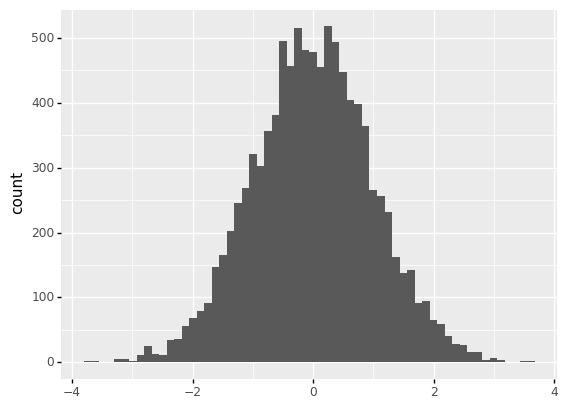

<ggplot: (8765712875439)>

In [12]:
fig = ggplot() + aes(x=arr) + geom_histogram()

utils.save_gg(fig, 2)

fig